# Домашняя работа №1

**Срок сдачи:** 9 октября 2017, 23:59 <br\>

При отправлении ДЗ в Dropbox указывайте фамилию в названии файла: <br\>
** IDA<Номер группы>HW1<Фамилия>.ipynb ** - например ** IDA1HW1Panov.ipynb **<br\>


Сопровождайте ваш код изображеними, комментариями и выводами. <br\>
Иммейте ввиду, что на некоторые задачи нет единственного верного и полного ответа. Чем больше информации вы сможете извлечь, аргументированных выводов сформулировать, тем лучше.

Используйте данный Ipython Notebook при оформлении домашнего задания.

# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Регрессия-с-SVM-(3-балла)" data-toc-modified-id="Регрессия-с-SVM-(3-балла)-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Регрессия с SVM (3 балла)</a></div><div class="lev2 toc-item"><a href="#Визуализация-данных-(1-балл)" data-toc-modified-id="Визуализация-данных-(1-балл)-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Визуализация данных (1 балл)</a></div><div class="lev2 toc-item"><a href="#Обучение-моделей-(2-балла)" data-toc-modified-id="Обучение-моделей-(2-балла)-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Обучение моделей (2 балла)</a></div><div class="lev1 toc-item"><a href="#Определение-языка-слова-(7-баллов)" data-toc-modified-id="Определение-языка-слова-(7-баллов)-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Определение языка слова (7 баллов)</a></div><div class="lev2 toc-item"><a href="#Загрузка-(1-балл)" data-toc-modified-id="Загрузка-(1-балл)-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Загрузка (1 балл)</a></div><div class="lev2 toc-item"><a href="#Подход-с-n-граммами-(2-балла)" data-toc-modified-id="Подход-с-n-граммами-(2-балла)-22"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Подход с n-граммами (2 балла)</a></div><div class="lev2 toc-item"><a href="#Подход-с-пользовательским-ядром" data-toc-modified-id="Подход-с-пользовательским-ядром-23"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Подход с пользовательским ядром</a></div><div class="lev3 toc-item"><a href="#Подготовка-данных-(1-балла)" data-toc-modified-id="Подготовка-данных-(1-балла)-231"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Подготовка данных (1 балла)</a></div><div class="lev3 toc-item"><a href="#Расчет-ядра-(2-балла)" data-toc-modified-id="Расчет-ядра-(2-балла)-232"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>Расчет ядра (2 балла)</a></div><div class="lev3 toc-item"><a href="#Оценка-качества-(1-балл)" data-toc-modified-id="Оценка-качества-(1-балл)-233"><span class="toc-item-num">2.3.3&nbsp;&nbsp;</span>Оценка качества (1 балл)</a></div>

# Регрессия с SVM (3 балла)

SVM можно использовать и для задачи регрессии.

Загрузите набор данных из *titanium.csv*<br/>
Будем решать задачу восстановления столбца 'y' по столбцу 'x'.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import  GridSearchCV
%matplotlib inline

In [2]:
df = pd.read_csv("titanium.csv")
print(df.index)

RangeIndex(start=0, stop=49, step=1)


In [3]:
df.head()

,x,y
0,585.0,0.644
1,595.0,0.622
2,605.0,0.638
3,615.0,0.649
4,625.0,0.652


In [4]:
df.describe()

,x,y
count,49.000000,49.000000
mean,825.000000,0.804592
std,142.886902,0.375022
min,585.000000,0.601000
25%,705.000000,0.627000
50%,825.000000,0.663000
75%,945.000000,0.730000
max,1065.000000,2.169000


## Визуализация данных (1 балл)

Выполните стандартную предобработку данных (вычет среднего и деление на стандартное отклонение) и выведите их на графике.

In [5]:
def my_normalize(vec):
    return (vec-vec.mean())/vec.std()

In [6]:
newdf = pd.DataFrame()
newdf['x'] = my_normalize(df['x'])
newdf['y'] = df['y']

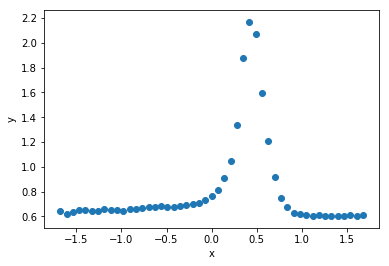

In [7]:
plt.scatter(newdf['x'],newdf['y'])
plt.xlabel('x')
plt.ylabel('y')

## Обучение моделей (2 балла)

Рассмотрим 3 ядра: 
* Линейное
* Полиномиальное (`degree = 3`, `gamma = 6`, `coef0 = 1`)
* RBF (`gamma = 6`, `coef0 = 1`)

Во всех случаях установите точность алгоритма оптимизации `epsilon=0.01`

Для каждого из ядер:
1. Постройте графики зависимости ошибки от параметра $C$ (ось графика со значениями параметра $C$ должна быть в логарифмической шкале). Ошибка измеряется как средняя абсолютная ошибка. 
2. Для наилучшего параметра $C$ постройте график с данными и предсказанием с помощью SVM.

В каких случаях возникают эффекты недообучения, переобучения?

In [8]:
X_train, X_test, y_train, y_test = train_test_split(np.array(newdf['x']),np.array(newdf['y']),test_size=0.3,random_state=23)

In [11]:
X_train = X_train.reshape(-1,1);
X_test = X_test.reshape(-1,1);

In [12]:
nC = np.logspace(-5,6,base = 10,num = 20)

# Linear kernel

In [13]:
svr_lin_score = dict()
svr_lin_train_score = dict()
for elem in nC:
    svr_lin = SVR(C = elem,epsilon=0.01,kernel="linear")
    svr_lin.fit(X_train, y_train)
    y_pred = svr_lin.predict(X_test)
    svr_lin_score[elem] = mean_absolute_error(y_test,y_pred)
    y_pred_train = svr_lin.predict(X_train)
    svr_lin_train_score[elem] = mean_absolute_error(y_train,y_pred_train)

In [14]:
def create_table(test,train):
    table = pd.DataFrame()
    table['C'] = list(test.keys())
    table['Test Score'] = list(test.values())
    table['Train Score'] = list(train.values())
    return table

In [13]:
create_table( svr_lin_score,svr_lin_train_score)

,C,Test Score,Train Score
0,0.000010,0.234960,0.151759
1,0.000038,0.235035,0.151743
2,0.000144,0.235317,0.151684
3,0.000546,0.236155,0.151417
4,0.002069,0.238441,0.150660
5,0.007848,0.239368,0.150049
6,0.029764,0.239368,0.150049
7,0.112884,0.238609,0.150078
8,0.428133,0.238276,0.150099
9,1.623777,0.237957,0.150115


In [14]:
best_lin_C = min(svr_lin_score,key=svr_lin_score.get)
best_lin_score = svr_lin_score[best_lin_C]

# Лучший параметр регуляризации С для линейного ядра: 263665.089873 
# MAE на этом C: 0.222303660402

In [15]:
print(best_lin_C,best_lin_score)

263665.089873 0.222303660402


# График зависимости MAE от параметра регуляризации C 

In [16]:
import matplotlib.patches as mpatches
import matplotlib as mpl


In [17]:
def plot_data1(x,test,train, best):
    plt.xlabel('C')
    plt.ylabel('MAE')
    plt.plot(x,list(test.values()),marker = 'o',c="b")
    plt.plot(x,list(train.values()),marker = 'o',c="r")
    plt.plot(best,test[best],marker = "D",c="g")
    red_patch = mpatches.Patch(color='red', label='train score')
    blue_patch = mpatches.Patch(color='blue', label='test score')
    green_patch = mpatches.Patch(color='green', label='optimum')
    plt.legend(handles=[red_patch,blue_patch,green_patch])
    mpl.rcParams['figure.figsize'] = (10.0,8.0)
    plt.show()

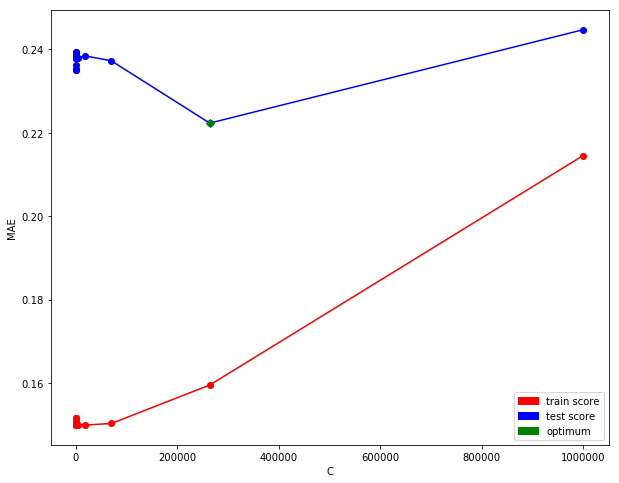

In [38]:
plot_data1(nC,svr_lin_score,svr_lin_train_score,best_lin_C)

In [19]:
svr_best = SVR(C = best_lin_C,epsilon=0.01,kernel="linear")
svr_best.fit(X_train,y_train)
y_lin_pred = svr_best.predict(X_test)

# График с данными и предсказанием SVM для наилучшего параметра регуляризации С

In [20]:
def plot_data2(y_pred): 
    plt.scatter(X_test,y_test,c="r")
    plt.scatter(X_test,y_pred,c="b")
    plt.xlabel('X')
    plt.ylabel('Y')
    red_patch = mpatches.Patch(color='red', label='true values')
    blue_patch = mpatches.Patch(color='blue', label='predicted values')
    plt.legend(handles=[red_patch,blue_patch])
    plt.show()

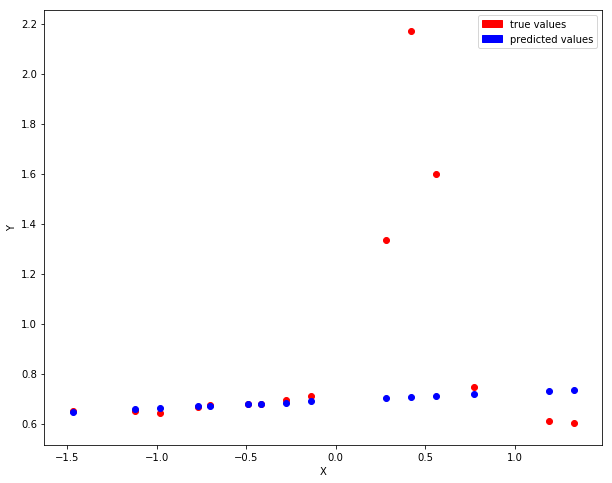

In [21]:
plot_data2(y_lin_pred)

### Качество SVM с линейным ядром довольно плохое, модель пытается аппроксимировать объекты некоторой прямой (что хорошо видно на изображении данных выше) и соответсвенно не может правильно аппроксимировать "изгиб" в районе x=0.5 (см. визуализацию данных). Модель имеет довольно значительную ошибку и на обучении, поэтому можно сказать что модель недообучена при любых значениях параметра C. Однако стоит отметить, что был найден интересный оптимум при очень большом значении параметра регуляризации, в этом оптимуме модель имеет минимальную ошибку на тесте, но большую ошибку на обучении

# Polynomial kernel

In [42]:
svr_poly_score = dict()
svr_poly_train_score = dict()
for elem in nC:
    svr_poly = SVR(C = elem,epsilon=0.01,kernel = "poly",degree = 3, gamma = 6, coef0 = 1)
    svr_poly.fit(X_train, y_train)
    y_pred = svr_poly.predict(X_test)
    svr_poly_score[elem] = mean_absolute_error(y_test,y_pred)
    y_pred_train = svr_poly.predict(X_train)
    svr_poly_train_score[elem] = mean_absolute_error(y_train,y_pred_train)

In [60]:
create_table(svr_poly_score,svr_poly_train_score)

,C,Test Score,Train Score
0,0.000010,0.221916,0.137324
1,0.000038,0.217399,0.132625
2,0.000144,0.217581,0.132554
3,0.000546,0.215877,0.132136
4,0.002069,0.213569,0.131699
5,0.007848,0.213279,0.131645
6,0.029764,0.213257,0.131643
7,0.112884,0.212552,0.131485
8,0.428133,0.212484,0.131472
9,1.623777,0.212233,0.131422


In [44]:
best_poly_C = min(svr_poly_score,key=svr_poly_score.get)
best_poly_score = svr_poly_score[best_poly_C]

In [45]:
best_poly_C,best_poly_score


(88.586679041008324, 0.20653222050191786)

# Лучший параметр регуляризации С для полиномиального ядра: 88
# MAE на этом C: 0.20653222050191786

# График зависимости MAE от параметра регуляризации C 

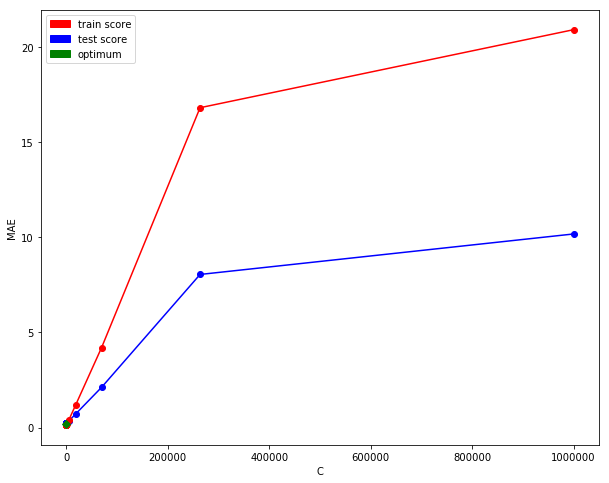

In [47]:
plot_data1(nC,svr_poly_score,svr_poly_train_score,best_poly_C)

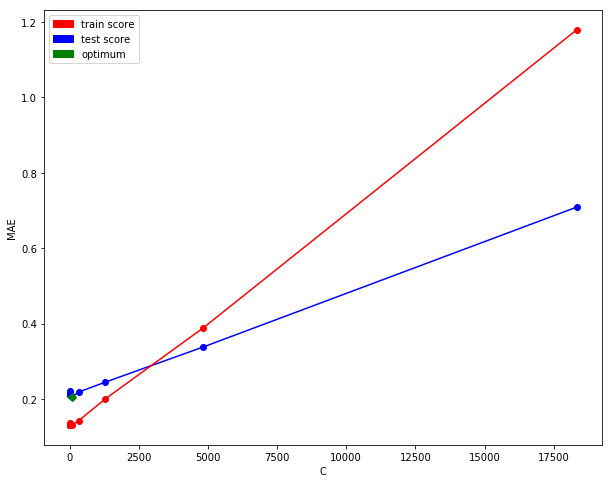

In [55]:
plot_data1(nC[:17],{x: svr_poly_score[x] for x in nC[:17]},{x: svr_poly_train_score[x] for x in nC[:17]},best_poly_C)

In [56]:
svr_poly_best = SVR(C = best_poly_C,epsilon=0.01,kernel="poly",degree = 3, gamma = 6, coef0 = 1)
svr_poly_best.fit(X_train,y_train)
y_poly_pred = svr_poly_best.predict(X_test)

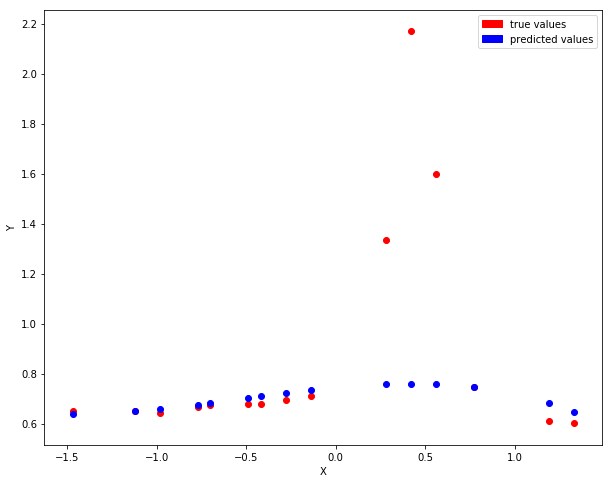

In [59]:
plot_data2(y_poly_pred)

### SVM с полиномиальным ядром решает задачу несколько лучше чем с линейным ядром (на изображении выше видно что модель пытается сделать необходимый "изгиб"), но ошибки на тесте и обучении все равно довольно существенные. Модель недообучена.

# RBF kernel

In [61]:
svr_rbf_score = dict()
svr_rbf_train_score = dict()
for elem in nC:
    svr_rbf = SVR(C = elem,epsilon=0.01,kernel = "rbf", gamma = 6, coef0 = 1)
    svr_rbf.fit(X_train, y_train)
    y_pred = svr_rbf.predict(X_test)
    svr_rbf_score[elem] = mean_absolute_error(y_test,y_pred)
    y_pred_train = svr_rbf.predict(X_train)
    svr_rbf_train_score[elem] = mean_absolute_error(y_train,y_pred_train)

In [62]:
create_table(svr_rbf_score,svr_rbf_train_score)

,C,Test Score,Train Score
0,0.000010,0.234884,0.151724
1,0.000038,0.234746,0.151610
2,0.000144,0.234224,0.151178
3,0.000546,0.232243,0.149539
4,0.002069,0.225191,0.143518
5,0.007848,0.209950,0.127235
6,0.029764,0.187359,0.104889
7,0.112884,0.144324,0.074316
8,0.428133,0.111601,0.056302
9,1.623777,0.072992,0.041787


In [63]:
best_rbf_C = min(svr_rbf_score,key=svr_rbf_score.get)
best_rbf_score = svr_rbf_score[best_rbf_C]

In [64]:
best_rbf_C,best_rbf_score


(263665.0898730366, 0.022329159317600371)

# Лучший параметр регуляризации С для ядра RBF: 263665.0898730366
# MAE на этом C: 0.022329159317600371

# График зависимости MAE от параметра регуляризации C 

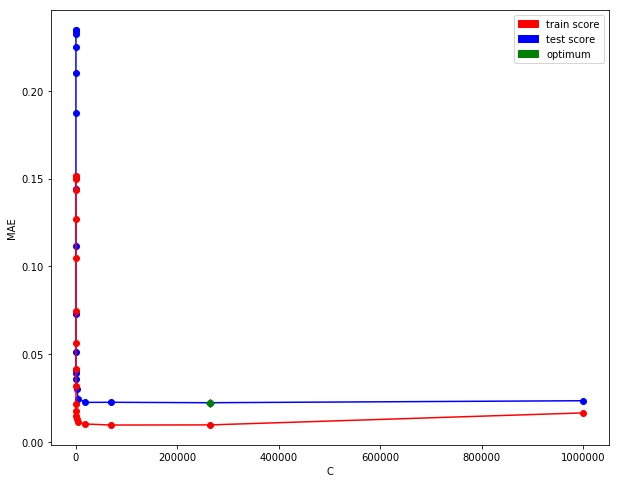

In [65]:
plot_data1(nC,svr_rbf_score,svr_rbf_train_score,best_rbf_C)

In [66]:
svr_rbf_best = SVR(C = best_rbf_C,epsilon=0.01,kernel="rbf", gamma = 6, coef0 = 1)
svr_rbf_best.fit(X_train,y_train)
y_rbf_pred = svr_rbf_best.predict(X_test)

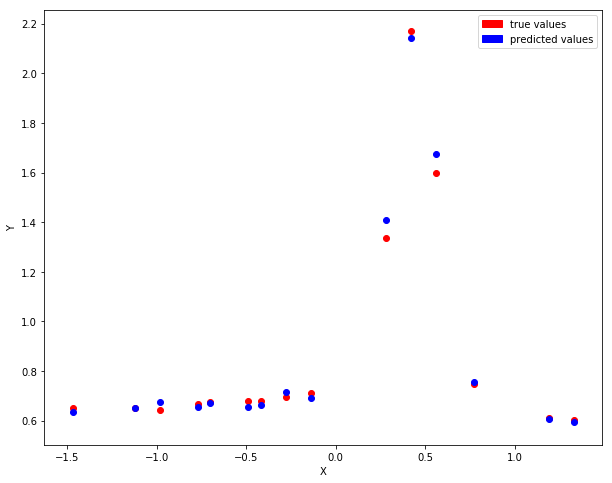

In [68]:
plot_data2(y_rbf_pred)

### SVM с ядром RBF хорошо решает данную задачу. Показывает признаки недообучения при маленьких значениях параметра C ( < 0.1). Достигает наилучших результатов при очень больших значениях C. 

# Определение языка слова (7 баллов)

В данном задании вам необходимо построить модель, которая будет определять, на каком языке написано слово. Сделать это будет предложено двумя способами.

Даны два текста - первые предложения произведения "Война и Мир" на английком и испанском, разбитые на слова.

## Загрузка (1 балл)

Загрузите данные из файлов *war_and_peace_es.txt* и *war_and_peace_en.txt*.<br/> 
В результате вы должны получить pandas.DataFrame со столбцами *index* | *word* | *label*, где *index* - это индекс pandas, *word* - это слово и *label* - это метка класса (0 или 1)

In [91]:
# like this

f_en = open("war_and_peace_en.txt",'r')
f_es = open("war_and_peace_es.txt",'r')
wp_en = list((f_en.read()).split())
wp_es = list((f_es.read()).split())
f_en.close()
f_es.close()
wp = wp_en + wp_es

In [137]:
wpdf = pd.DataFrame()
wpdf['word'] = wp
wpdf['label'] = np.vstack((np.zeros(len(wp_en),dtype=int).reshape(-1,1),np.ones(len(wp_es),dtype=int).reshape(-1,1)))

In [138]:
wpdf.head()

,word,label
0,war,0
1,and,0
2,peace,0
3,leo,0
4,tolstoy,0


In [17]:
wpdf.iloc[5]['word']

'book'

## Подход с n-граммами (2 балла)

На этом этапе предлагается построить модель используя n-граммы слов, то есть последовательностях из n символов.<br/>
Таким образом, признаками наших данных будут все найденные n-граммы слов, а значениями признаков будут частоты соответствующих n-грамм в слове.<br/>
Например, для слова "guerra" би-граммами будут "gu", "ue", "er", "rr", "ra", каждая из которых встречается в нем с частотой 1.

Для того, чтобы выделять n-граммы, удобно использовать `CountVectorizer()` с аргументами `analyzer='char'` и `ngram_range=(n_min, n_max)`. Вы наверняка встречались с этим векторизатором в предыдущем модуле.

Таким образом, сделайте следующее:
1. Задайте переменную RND_SEED, которая будет использоваться в любых генераторах случайных чисел в вашем коде (обычно параметр "random_seed")
2. Разбейте данные на обучающую и отложенную выборку в пропорции 80/20
3. Составьте [`Pipeline`](http://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html), состоящий из `CountVectorizer()` и SVM с линейным ядром
4. Исследуйте, как влияют размер n-грамм и величина штрафа `C` на предсказательную силу модели. Мера качества - accuracy.

In [11]:
RND_SEED = 23

In [7]:
X_train, X_test, y_train, y_test = train_test_split(np.array(wpdf['word']),np.array(wpdf['label']),test_size=0.2,random_state=RND_SEED)

wpdf.index.values

In [12]:
word_clf = Pipeline([('vect',CountVectorizer(analyzer='char')),
                     ('svm',SVC(kernel='linear',random_state=RND_SEED))])

In [ ]:
word_clf.fit(X_train,y_train)
y_pred = word_clf.predict(X_test)

In [129]:
accuracy_score(y_pred,y_test)

0.94782989916703198

In [8]:
params = dict(svm__C=np.logspace(-3,1,5),vect__ngram_range=[(2,2),(2,3),(2,4),(3,3)])

In [9]:
from sklearn.model_selection import StratifiedShuffleSplit

In [14]:
cv = GridSearchCV(param_grid=params,cv=StratifiedShuffleSplit(n_splits=4,train_size=0.8, random_state=RND_SEED),estimator=word_clf, n_jobs=4,scoring='accuracy')

In [15]:
cv.fit(wpdf['word'],wpdf['label'])

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=4, random_state=23, test_size=0.1,
            train_size=0.8),
       error_score='raise',
       estimator=Pipeline(steps=[('vect', CountVectorizer(analyzer='char', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...r',
  max_iter=-1, probability=False, random_state=23, shrinking=True,
  tol=0.001, verbose=False))]),
       fit_params={}, iid=True, n_jobs=4,
       param_grid={'vect__ngram_range': [(2, 2), (2, 3), (2, 4), (3, 3)], 'svm__C': array([  1.00000e-03,   1.00000e-02,   1.00000e-01,   1.00000e+00,
         1.00000e+01])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [16]:
cv.grid_scores_

/home/alex/anaconda3/lib/python3.5/site-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.60824, std: 0.00377, params: {'vect__ngram_range': (2, 2), 'svm__C': 0.001},
 mean: 0.61722, std: 0.00486, params: {'vect__ngram_range': (2, 3), 'svm__C': 0.001},
 mean: 0.61963, std: 0.00451, params: {'vect__ngram_range': (2, 4), 'svm__C': 0.001},
 mean: 0.55741, std: 0.00000, params: {'vect__ngram_range': (3, 3), 'svm__C': 0.001},
 mean: 0.82866, std: 0.00319, params: {'vect__ngram_range': (2, 2), 'svm__C': 0.01},
 mean: 0.86919, std: 0.00505, params: {'vect__ngram_range': (2, 3), 'svm__C': 0.01},
 mean: 0.88212, std: 0.00542, params: {'vect__ngram_range': (2, 4), 'svm__C': 0.01},
 mean: 0.75964, std: 0.00782, params: {'vect__ngram_range': (3, 3), 'svm__C': 0.01},
 mean: 0.87862, std: 0.00517, params: {'vect__ngram_range': (2, 2), 'svm__C': 0.10000000000000001},
 mean: 0.92791, std: 0.00953, params: {'vect__ngram_range': (2, 3), 'svm__C': 0.10000000000000001},
 mean: 0.93975, std: 0.00671, params: {'vect__ngram_range': (2, 4), 'svm__C': 0.10000000000000001},
 mean: 0.91433, 

### Качество модели заметно увеличивается с ростом значения параметра C до 1, далее улучшается лишь незначительно (и ухудшается для ngram_range: (2, 4)). Качество тем лучше чем больше различных n-грамм в обучающей выборке (так, например, качесвто модели с би-граммами, три-граммами и 4-граммами лучше чем качество модели только с три-граммами). Лучшее качество ~95% достигается при С = 1 и ngram_range = (2,4) 

## Подход с пользовательским ядром
### Подготовка данных (1 балла)

Особенностью пользовательского ядра в sklean.SVC является то, что на вход оно может принимать на вход **только** вектора чисел.<br/>
В нашем случае это будут индексы соответствующих слов из корпуса. То есть вместо вектора ['treat', 'celebrit', 'prince', ...] на вход в ядро подается вектор из индексов [9209, 11145, 7735, ...] с помощью которых вы будете находить сами слова.

Прежде чем мы начнем строить ядро, надо подготовить данные. Для этого:
1. Задайте переменную RND_SEED, которая будет использоваться в любых генераторах случайных чисел в вашем коде (обычно параметр "random_seed")
2. Случайным образом перемешайте и заново проиндексируйте таблицу, полученную выше (используйте методы `df.sample()` и `df.reset_index()`)
3. Ядро может вычисляться достаточно долго, поэтому можете урезать таблицу, но оставить в ней не менее 1000 слов.
4. Разбейте данные на обучающую и контрольную выборку в пропорции 80/20

В результате вы должны получить вектор-столбец `X_train`, `X_test` с **индексами** слов и векторы `y_train`, `y_test` с метками классов.

In [139]:
RND_SEED = 23
wpdf = wpdf.sample(n=11403,random_state=RND_SEED)
wpdf.reset_index(inplace=True)

In [142]:
wpdf.drop('index',axis=1,inplace=True)

In [143]:
wpdf.head(10)

,word,label
0,triste,1
1,had,0
2,perch,1
3,you,0
4,rapata,1
5,crush,0
6,che,1
7,parola,1
8,prendeva,1
9,was,0


In [161]:
X_train, X_test, y_train, y_test = train_test_split(np.array(wpdf.index.values)[:1250],np.array(wpdf['label'])[:1250],test_size=0.2,random_state=RND_SEED)

In [162]:
X_train.shape, X_test.shape

((1000,), (250,))

### Расчет ядра (2 балла)

Теперь напишем собственное ядро для классификации строк. Для сравнения строк будем использовать [расстояние Левенштейна](https://ru.wikipedia.org/wiki/Расстояние_Левенштейна). Реализацию этого расстояния можно получить одним из двух способов:
* скопировать функцию wfi_levenshtein из файла [pylev.py](https://github.com/toastdriven/pylev/blob/master/pylev.py)
* поставить пакет [editdistance](https://pypi.python.org/pypi/editdistance) (будет работать быстрее, чем предыдущая реализация, но могут возникнуть проблемы с установкой)

Ядро для сравнения строк должно принимать максимальное значение, когда слова одинаковы, и минимальное, когда очень отличаются. Это противоположно свойствам расстояния Левенштейна: оно равно 0, когда слова одинаковы, и максимально, когда слова разные. Поэтому подставьте значение расстояния Левенштейна в какое-нибудь ядро, зависящее от расстояния между объектами (например, гауссовское).

Функция, реализующая расчет ядра должна принимать две матрицы $U$ и $V$ с признаковым описанием объектов (во время обучения они обе относятся к обучающей выборке, а во время применения - одна матрица относится к обучающей выборке, а другая к контрольной).
Функция должна возвращать матрицу значений ядра для всех объектов попарно: $G_{ij} = K(U_i, V_j)$. Здесь $U_i$ — i-ый объект выборки $U$, а $V_j$ — j-ый объект выборки $V$.

Сделайте следующее:
1. Напишите функцию *string_kernel(U, V)*, расчитывающую матрицу ядра $G_{ij}$
2. Визуализируйте матрицу только для тренировочной выборки (функция plt.imshow()).


In [5]:
import editdistance

In [30]:
from math import exp

In [21]:
def string_kernel(U, V):
    mat = np.zeros((len(U),len(V)))
    gamma = 0.35
    for i in range(len(U)):
        for j in range(len(V)):
            mat[i,j] = exp(-gamma*editdistance.eval(wpdf.iloc[int(U[i])]['word'],wpdf.iloc[int(V[j])]['word']))
    return mat

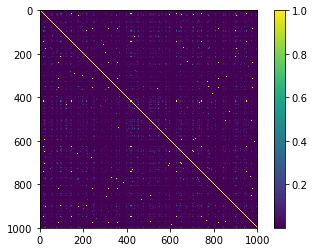

In [164]:
plt.imshow(string_kernel_thr(X_train,X_train,1))
plt.colorbar()

### Оценка качества (1 балл)

Обучите метод опорных векторов с различными значениями параметра штрафа $C$.<br/>
Для каждого значения выведите accuracy на обучащей и контрольной выборке.

Постарайтесь достичь качества в 70% на тестовой выборке. Для улучшения качества можно увеличить размер тренировочной выборки. Но тогда обучение будет происходить дольше.

In [28]:
import multiprocessing

In [41]:
def calc(s,U,V,mat,gamma):
    #print("U: "+str(len(U))+" V:"+str(len(V)))
    num_thr = multiprocessing.cpu_count()
    row = len(V)
    from_ = int((s * len(U))//num_thr)
    to_ = int(((s+1) * len(U))//num_thr)
    for i in range(from_,to_):
        for j in range(len(V)):
            mat[i*row+j] = exp(-gamma*editdistance.eval(wpdf.iloc[int(U[i])]['word'],wpdf.iloc[int(V[j])]['word']))
    #print("finished calculating slice"+" from "+str(from_) +' to '+ str(to_))


In [76]:
#Параллельное вычисление матрицы ядра
def string_kernel_thr(U, V,gamma):
    num_thr = multiprocessing.cpu_count()
    mat = multiprocessing.Array("d",np.zeros((len(U)*len(V),)))
    thr_list = list()
    for i in range(num_thr):
        thr_list.append(multiprocessing.Process(target=calc, args=(i,U,V,mat,gamma)))
        thr_list[i].start()
    for i in range(num_thr):
        (thr_list[i]).join()
    fin_mat = (np.array(mat)).reshape((len(U),len(V)))
    return fin_mat

In [165]:
class AutoVivification(dict):
    """Implementation of perl's autovivification feature."""
    def __getitem__(self, item):
        try:
            return dict.__getitem__(self, item)
        except KeyError:
            value = self[item] = type(self)()
            return value

In [166]:
gammas_ = np.arange(0.1,1.1,0.1)
nC = np.logspace(-5,3,10)
scores = AutoVivification()

In [168]:
#Пояснение: чтобы обучать svm с различными параметрами C необязатаельно каждый раз вычислять матрицы ядра,
#тк они не зависят от C.
#При этом чтобы подобрать оптимальный параметр gamma для ядра Гаусса,в которое подается расстояние Левенштейна
#Будем поступать следующим образом:
#1) Вычислим матрицы ядра (string_kernel(X_train,X_train) для fit и string_kernel(X_train,X_test) для predict)
#2) Для каждого C будем подавать эти матрицы в SVC(kernel = 'precomputed')
for gamma in gammas_:
    train_mat = string_kernel_thr(X_train,X_train,gamma)
    test_mat = string_kernel_thr(X_train,X_test,gamma)
    for elem in nC:
        svc = SVC(C=elem,kernel = 'precomputed')
        svc.fit(train_mat,y_train)
        y_pred = svc.predict(test_mat)
        scores[gamma][elem] = accuracy_score(y_pred,y_test)

Process Process-31:
Traceback (most recent call last):
  File "/home/alex/anaconda3/lib/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
Traceback (most recent call last):
  File "/home/alex/anaconda3/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
Process Process-30:
Process Process-29:
Process Process-32:
  File "<ipython-input-41-0479562bd1a6>", line 9, in calc
    mat[i*row+j] = exp(-gamma*editdistance.eval(wpdf.iloc[int(U[i])]['word'],wpdf.iloc[int(V[j])]['word']))
  File "/home/alex/anaconda3/lib/python3.5/site-packages/pandas/core/indexing.py", line 1328, in __getitem__
    return self._getitem_axis(key, axis=0)
  File "/home/alex/anaconda3/lib/python3.5/site-packages/pandas/core/indexing.py", line 1737, in _getitem_axis
    elif is_list_like_indexer(key):
Traceback (most recent call last):
  File "/home/alex/anaconda3/lib/python3.5/site-packages/pandas/core/indexing.py", line 2033, in is_list_

KeyboardInterrupt: 

  File "<ipython-input-41-0479562bd1a6>", line 9, in calc
    mat[i*row+j] = exp(-gamma*editdistance.eval(wpdf.iloc[int(U[i])]['word'],wpdf.iloc[int(V[j])]['word']))
  File "/home/alex/anaconda3/lib/python3.5/site-packages/pandas/core/indexing.py", line 1328, in __getitem__
    return self._getitem_axis(key, axis=0)
KeyboardInterrupt
  File "/home/alex/anaconda3/lib/python3.5/site-packages/pandas/core/indexes/base.py", line 2422, in get_value
    s = _values_from_object(series)
  File "/home/alex/anaconda3/lib/python3.5/site-packages/pandas/core/series.py", line 601, in __getitem__
    result = self.index.get_value(self, key)
  File "pandas/_libs/lib.pyx", line 93, in pandas._libs.lib.values_from_object (pandas/_libs/lib.c:4618)
  File "/home/alex/anaconda3/lib/python3.5/site-packages/pandas/core/series.py", line 391, in get_values
    return self._data.get_values()
  File "/home/alex/anaconda3/lib/python3.5/site-packages/pandas/core/internals.py", line 4226, in get_values
    return n